<a href="https://colab.research.google.com/github/michaelcalvinwood/ml-base-models/blob/main/Single_Feature_Regression_Range_100_to_100_Step_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the Data

In [2]:
import tensorflow as tf

In [4]:
X = tf.range(-100, 100, 4)
y = X + 10

## Visualize the Data

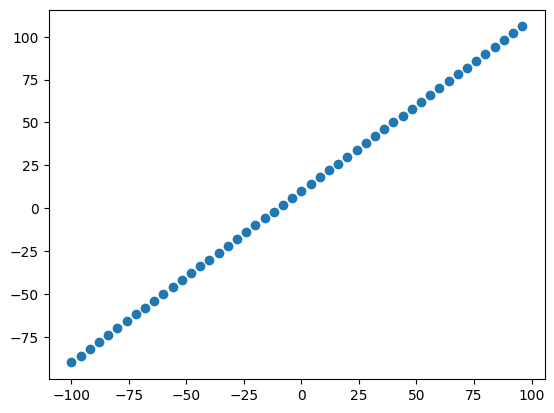

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

## Split the Data

In [8]:
test_percent = 0.2
num_train = int(len(X) * (1 - test_percent))

X_train = X[:num_train]
y_train = y[:num_train]

X_test = X[num_train:]
y_test = y[num_train:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

## Visualize Split Data

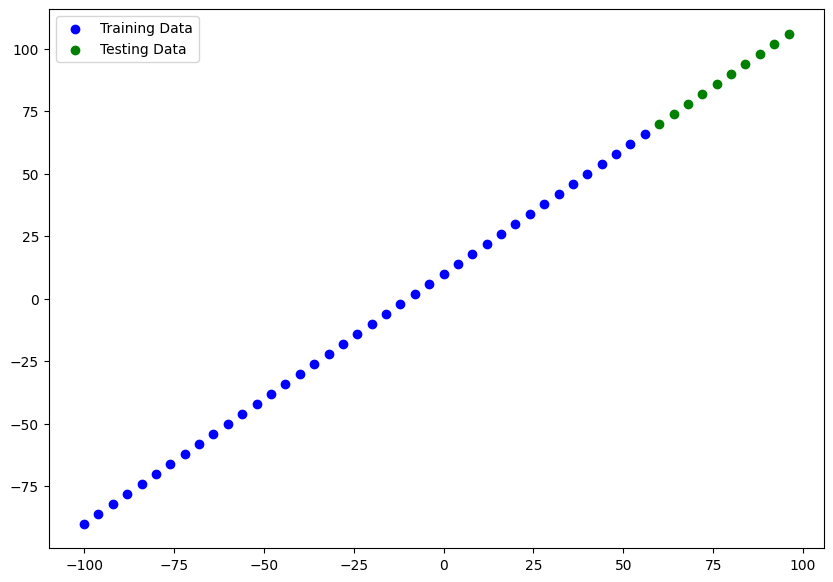

In [9]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training Data") # color blue
plt.scatter(X_test, y_test, c='g', label="Testing Data") # color green
plt.legend() # add a legend based on the labels & colors

## Create the Model

In [13]:
model = tf.keras.Sequential([
     tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation=None)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=["mae"]
)
model.fit(X_train, y_train, epochs=100, verbose=0)

## Analyze Model Effectiveness

### Visualize Predictions

1/1 [==============================] - 0s 88ms/step


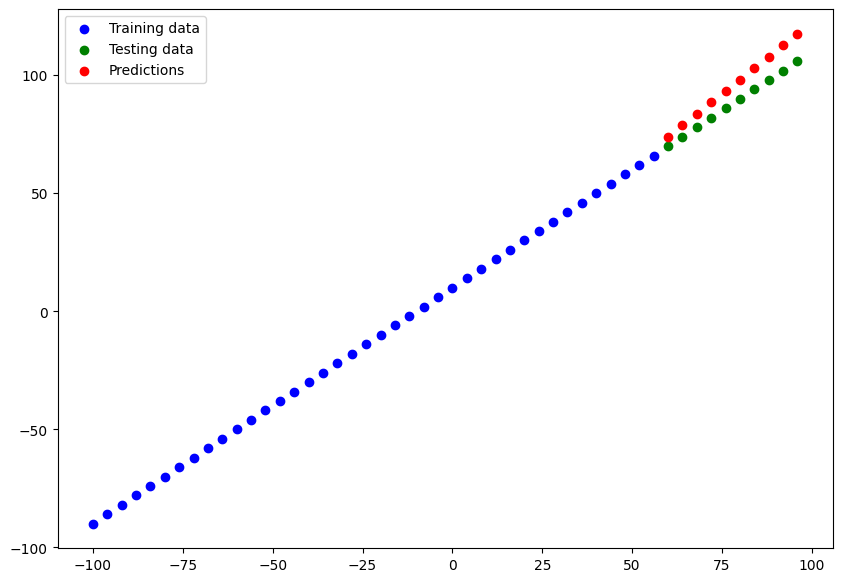

In [17]:
y_pred = model.predict(X_test)
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()

plot_predictions(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred)

### Analyze Performance Metrics

Evaluating the Prediction with Regression Metrics

When doing regression, the most important metrics are:

MAE : Mean Absolute Error **a great starter metric for any regression problem**

MSE : Mean Square Error **use when larger errors are more significant than smaller errors (as it amplifies the magnitude of larger errors)**

Huber : Combination of MAE & MSE **less sensitive to outliers than MSE**

***This is why we use these metrics in training (fitting) the model***

In [18]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 322ms/step - loss: 7.7539 - mae: 7.7539


[7.753905296325684, 7.753905296325684]

In [20]:
# Manually compute MAE
def calc_mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=y_pred)

def calc_mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)

# Let's squeeze y_pred
y_pred = tf.squeeze(y_pred)
mae = calc_mae(y_test, y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=7.7539053>

In [22]:
mse = calc_mse(y_test, y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=66.03819>